In [55]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

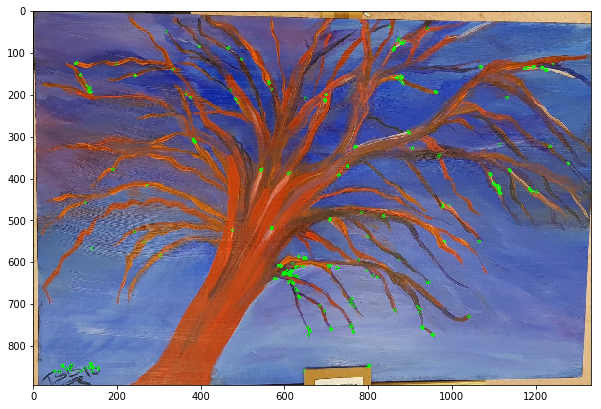

In [56]:
img_color = cv2.imread('arbol.jpg')

img = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img_color,kp,cv2.DRAW_MATCHES_FLAGS_DEFAULT,color=(0,255,0), flags=0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

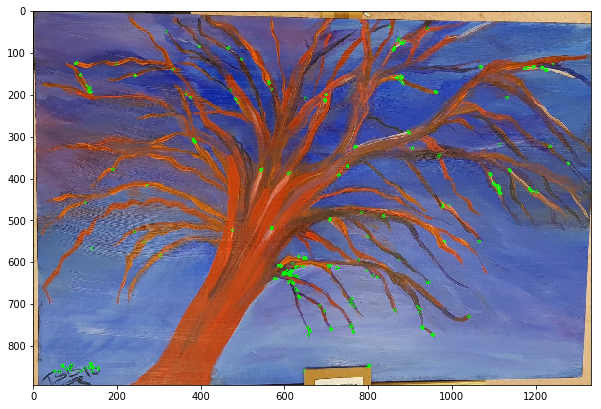

In [83]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

img1_color = cv2.imread('arbol.jpg') # queryImage
img2_color = cv2.imread('fondo.jpg') # trainImage

img1 = cv2.cvtColor(img1_color,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create(MAX_FEATURES)

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


# draw only keypoints location,not size and orientation
img_points = cv2.drawKeypoints(img1_color,kp1,cv2.DRAW_MATCHES_FLAGS_DEFAULT,color=(0,255,0), flags=0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_points, cv2.COLOR_BGR2RGB))
plt.show()

# draw only keypoints location,not size and orientation
#img_points2 = cv2.drawKeypoints(img2_color,kp2,cv2.DRAW_MATCHES_FLAGS_DEFAULT,color=(0,255,0), flags=0)
#plt.figure(figsize=(10, 10))
#plt.imshow(cv2.cvtColor(img_points2, cv2.COLOR_BGR2RGB))
#plt.show()

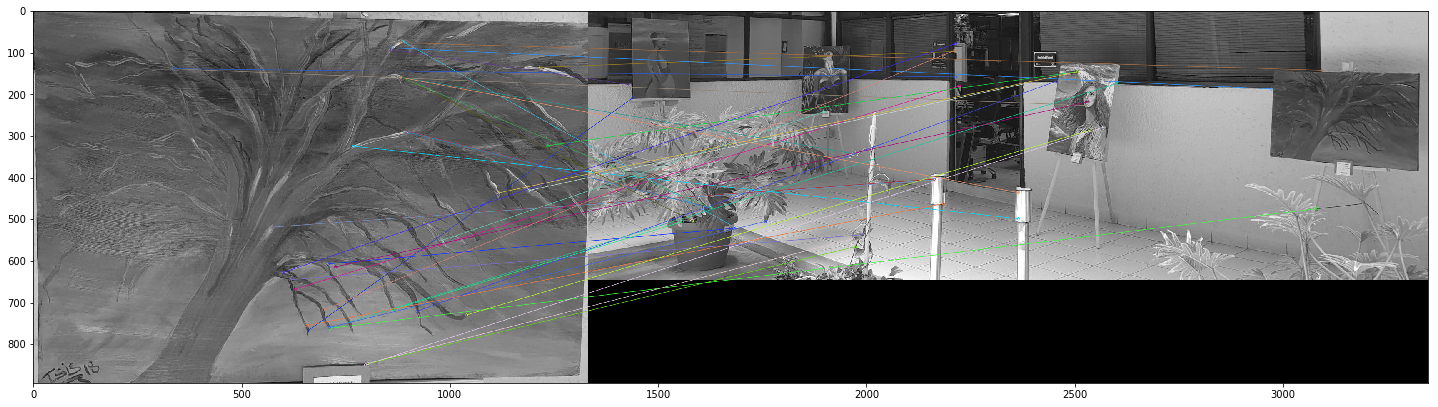

In [89]:
#Match features
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des1, des2, None)
   
#Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)
 
#Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]
#Draw top matches
imMatches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:200],imMatches,flags=2)

plt.figure(figsize=(25, 25))
plt.imshow(imMatches)
plt.show()


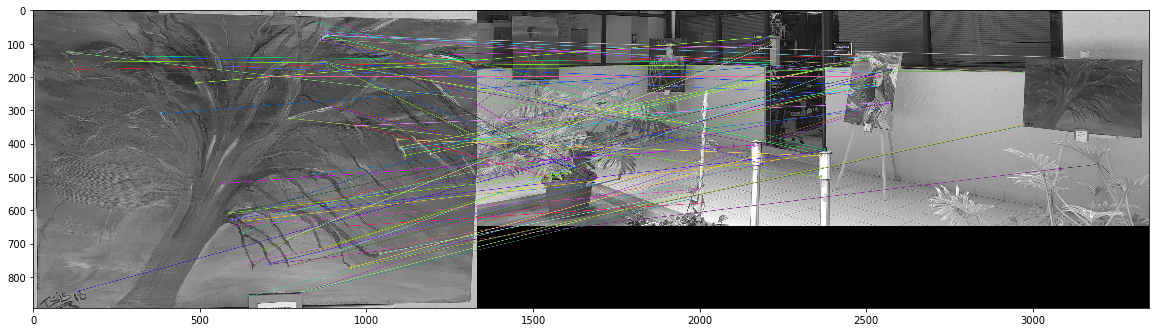

In [90]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:80], img3, flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()

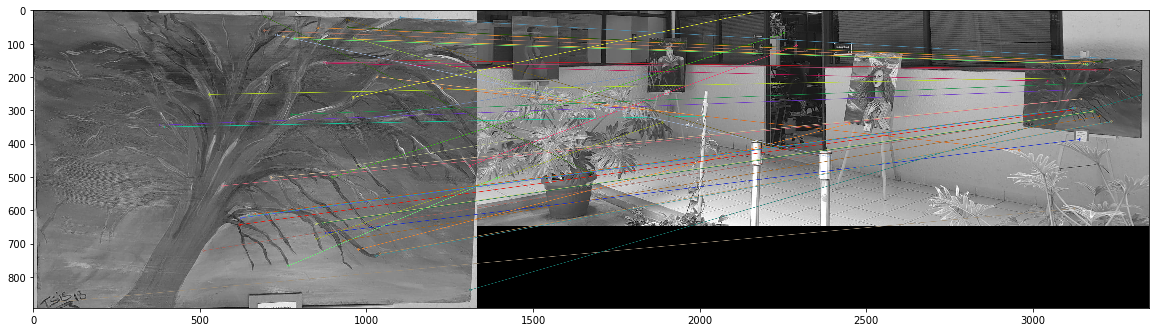

In [80]:

img1 = cv2.imread('arbol.jpg',0) # queryImage
img2 = cv2.imread('fondo.jpg',0) # trainImage
# Initiate SIFT detector
sift =  cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv2.drawMatchesKnn expects list of lists as matches.

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()
